#### Nguyễn Tiến Dũng

KSTN - Toán Tin - K62

Đại học Bách khoa Hà Nội

20170062

##### Câu 1:

**a.** Không gian trạng thái $$\mathbb{I}_Y = \{-1, 1\}$$

Xét $I_i \in \{\{0\}, \{1;2\}\}$

Ta có: 

$$
P(Y_{n+1} = i_{n+1}|Y_{n} = i_n, Y_{n-1} = i_{n-1},...,Y_0 = i_0)  
= P(X_{n+1} \in \{I_{n+1}\}|X_n \in \{I_n\},...,X_0 \in \{I_0\})
= \sum P(X_{n+1} = j_{n+1}|X_{n} = j_n, X_{n-1} = j_{n-1},...,X_0 = j_0)
= \sum P(X_{n+1} = j_{n+1}|X_{n} = j_n)
$$

Mặt khác, ta có:

$$
P(Y_{n+1} = i_{n+1}|Y_{n} = i_n) = P(X_{n+1} \in \{I_{n+1}\}|X_n \in \{I_n\})
= \sum P(X_{n+1} = j_{n+1}|X_{n} = j_n)
$$

Từ đó chứng tỏ $(Y_n)$ là một xích Markov

**b.** Ma trận xác suất chuyển.

Ta có 
$$
p_{-1, 1}^Y = P(X_n{n+1} = 1|X_n = 0) + P(X_{n+1} = 2|X_n = 0) = \frac{4}{7}
$$

Tương tự như vậy, ma trận xác suất chuyển là 
$$
P_Y = \begin{bmatrix}
\frac{3}{7}&\frac{4}{7}\\
0.07x + \frac{1}{11}(1-x) &  0.77x + \frac{10}{11}(1-x)
\end{bmatrix}
$$

##### Câu 2:

\begin{equation}
P = \begin{bmatrix}
-1.164 & -0.622 & 0.993 \\
1.586 & 0.670 & 0.973 \\
1&1&1
\end{bmatrix}\begin{bmatrix}
-0.181 & 0& 0 \\
0 & -0.039 & 0 \\
0&0&0.990
\end{bmatrix}\begin{bmatrix}
-0.184&0.983&-0.774\\
-0.373&-1.313&1.648\\
0.577&0.330&0.125
\end{bmatrix}
\end{equation}

**a.** Từ đó dễ dàng xác định được $P^n$.

**b.** Ta có vector phân phối tại thời điểm $n$ là:

$$
\lambda_n = \lambda*P^n = [-0.119x - 0.130y + 0.568z, 0.633x-0.457y+0.325z, -0.498x+0.382y+0.123z]
$$

với $x = (-0.181)^n, y = (-0.039)^n, z = (0.990^n)$

##### Câu 3:

*Ảnh được đặt trong thư mục assignment_img trong trường hợp lỗi hiển thị*

**a.**

Đồ thị của xích Markov như sau:

![a](./assignment_img/2-3-a.eps)

Từ đó ta thấy

- Lớp liên thông: $\{1, 2\}, \{4\}$
- Xích Markov không tối giản do không có trạng thái nào đến được `2`

**b.** 

Đồ thị của xích Markov như sau:

![b](./assignment_img/2-3-b.eps)

Từ đó thấy: 

- Các lớp liên thông: $\{1\}, \{2\}, \{3,4\}$
- Không tối giản do `0` không liên thông với trạng thái nào

##### Câu 4:

*Ý tưởng*

Chương trình sử dụng `BFS` để tìm đường đi giữa 2 đỉnh trong một đồ thị, tức là nếu tồn tại đường đi trên đồ thị từ đỉnh `source` đến `target` thì trạng thái `source` $\rightarrow$ `target`

*Data structure*

Ta sử dụng `adjacency list` để biểu diễn đồ thị, do đó cần chuyển từ ma trận xác suất chuyển thành `adjacency list`.

Không cần quan tâm đến giá trị các ô trong ma trận, chỉ cần khác 0 là có đường đi

```python
def convert_to_adjacency(state, P):
    adjagecy_vector = {i:[] for i in state}
    for i in range(len(P)):
        for j in range(len(P)):
            if P[i][j] != 0:
                adjagecy_vector[state[i]].append(state[j])
    return adjagecy_vector
```

*Thuật toán*

Sử dụng `BFS`:

```python
def is_connected(state, P, source, target):
    vector = convert_to_adjacency(state, P)
    visit_status = {i: False for i in state}
    queue = []
    queue.append(source)
    while queue != []:
        current_state = queue[0]
        queue.pop(0)
        visit_status[current_state] = True
        for s in vector[current_state]:
            if visit_status[s] == False:
                queue.append(s)
        if target in queue:
            return True
    return False
```

In [1]:
import processviz as pvz
import numpy as np

G = pvz.MarkovChain()
G.from_file()

Kiểm tra trạng thái `A` có đến được trạng thái `B` hay không 

```python
self.is_connected(source, target)
```

Ví dụ, đối với xích Markov `G`, để kiểm tra trạng thái `i` có thể đến được trạng thái `j` hay không, ta làm như sau:

```python
G.is_connected(i, j)
```

In [2]:
for i in G.state:
    for j in G.state:
        print(i, '->', j, ': ', G.is_connected(i, j))

Rich -> Rich :  True
Rich -> Neutral :  True
Rich -> Poor :  True
Rich -> Loser :  True
Neutral -> Rich :  True
Neutral -> Neutral :  True
Neutral -> Poor :  True
Neutral -> Loser :  True
Poor -> Rich :  True
Poor -> Neutral :  True
Poor -> Poor :  True
Poor -> Loser :  True
Loser -> Rich :  True
Loser -> Neutral :  True
Loser -> Poor :  True
Loser -> Loser :  True


##### Câu 5:

Ma trận xác suất chuyển $T$ được gọi là ma trận xác suất chuyển chính quy (ergodic) nếu tồn tại $n$ sao cho $T^n$ có tất cả các phần tử đều khác 0. Xích Markov được biểu diễn bởi $T$ được gọi là xích Markov chính quy.

Xét xích `Markov` $(X_n)_{n\ge0}$ có ma trận xác suất chuyển $P$.

---
##### Các kiến thức bổ sung:

**Định nghĩa 1:** *Trạng thái $i$ được gọi là `recurrent` nếu $\sum_{n = 1}^{\infty}p_{ii}^{(n)} = \infty$*

**Định nghĩa 2:** *Trạng thái $i$ có `period` $d > 1$ nếu $d$ là số lớn nhất thỏa mãn $p_{ii}^{(n)} > 0$ với mọi $n: d|n$ và $p_{ii}^{(n)} = 0$ trong các trường hợp còn lại $\rightarrow$ `periodic`

**Định nghĩa 3:** *Trạng thái $i$ không có chu kì được gọi là `aperiodic`*

**Định lí 1:** Xích `Markov` hữu hạn là tối giản thì các trạng thái là `recurrent`.

*Chứng minh*

Giả sử tồn tại trạng thái $i$ là `transient`. Khi đó tồn tại $n^*$ là số tự nhiên lớn nhất sao cho $p_{ii}^{n^*} > 0$. Ta chứng minh tồn tại số lớn hơn thoả mãn tính chất này.

Thật vậy, xét $p_{ii}^n$. Do $P$ là `irreducible`, ta đặt $n_{ij}: p_{ij}^{n_{ij}} > 0$. Ta có:

$$
p_{ij}^{n} \ge p_{ii_1}^{m_1}p_{i_1i_2}^{m_2}...p_{i_ni}^{m_{n+1}}, n = \sum_{k =1}^{n+1}m_{k}
$$

Khi đó, với mỗi $i_k \rightarrow i_{k+1}$, ta có thể lấy đoạn đường đi qua các đỉnh con $i_{k1}, i_{k2},..,i_{kn}, i_{k+1}$, mỗi đoạn này là tồn tại do xích là `irreducible`.

Quá trình này tiếp tục cho đến khi $n > n^*$, điều này trái với giả thiết ban đầu.

Điều vô lí này chứng tỏ các trạng thái của $P$ là `recurrent`

**Bổ đề:** *Giả sử $i$ là `aperiodic`, ta chứng minh tồn tại $n_i$ để $\forall n > n_i, p_{ii}^{(n)} > 0$.*

*Chứng minh*

Hiển nhiên dễ thấy $i$ là `recurrent`.

Xét $T = \{n|p_{ii}^{(n)}>0\}$. Do $i$ là `aperiodic` nên dễ thấy $d = GCD(n, n \in T) = 1$. Lấy $n_1, n_2 \in T$ sao cho $GCD(n_1, n_2) = 1$.

Khi đó, theo định lí [Sylvestor - Chicken McNugget theorem](https://artofproblemsolving.com/wiki/index.php/Chicken_McNugget_Theorem), ta có: 

$$
\forall n > (n_1-1)(n_2-1) \\\Rightarrow p_{ii}^{(n)} > 0
$$

Ta có điều cần chứng minh.

---
*Chứng minh*

Ta chứng minh nếu $(X_n)$ là `irreducible` và tồn tại một trạng thái là `aperiodic` thì xích $(X_n)$ chính quy.

Thật vậy, giả sử $i$ là `aperiodic`. Ta chứng minh $\forall j \in I$, $j$ là `aperiodic`.

Theo bổ đề trên, hiển nhiên tồn tại $n_1$ sao cho $p_{ii}^{n}>0, n>n_1$. Do $P$ là `irreducible` nên tồn tại $n_{ij}, n_{ji}$ sao cho $p_{ij}^{n_{ij}}>0, p_{ji}^{n_{ji}}>0$.

Có:
$$
p_{jj}^{n_{ij} + n + n_{ji}} \ge p_{ij}^{n_{ij}}p_{ii}^{n}p_{ji}^{n_{ji}} > 0
$$

Lại có:
$$
p_{jj}^{n_{ij} + n+1 + n_{ji}} \ge p_{ij}^{n_{ij}}p_{ii}^{n+1}p_{ji}^{n_{ji}} > 0
$$

Vậy chứng tỏ $j$ là `aperiodic`.

Tiếp theo ta chứng minh tồn tại $N$ để $p_{ij}^N>0$.

Đặt $q = \underset{n_i}{max}\{p_{ii}^{(n)}>0, n>n_i\}$. Khi đó, ta chứng minh tồn tại $t$ sao cho $p_{ij}^{(t)} > 0$.

Có:
$$
\left\{\begin{matrix}
p_{ii}^{(t)} > 0\\ 
p_{ij}^{(t)} \ge p_{ij}^{n_{ij}}p_{jj}^{t - n_{ij}} > 0
\end{matrix}\right.
$$

Để điều trên xảy ra với mọi $i, j$, ta chọn $t = \underset{i, j}{max}\{n_{ij} + q\}$

Vậy ta có $(X_n)_{n \ge 0}$ là chính quy.

---

**Remark:** Em mới chỉ tìm được một số điều kiện để chứng minh $P$ là chính quy

Có điều kiện cần $P$ chính quy $\rightarrow$ phương trình $\pi P = \pi$ có nghiệm duy nhất, thì cũng suy ra được nếu $\pi(P - I) = 0$ không có nghiệm duy nhất thì $P$ không chính quy, nhưng mà em cũng không chắc được đó là tất cả các trường hợp cần tìm để $P$ chính quy, ví dụ như nếu rank(P - I) = len(P) nhưng mà không có trạng thái nào là `aperiodic`, hoặc sau khi luỹ thừa lên vài lần nó bắt đầu có hẳn 1 cột bằng 0 (transient).

Tạm thời trong bài này em sẽ kiểm tra 2 điều kiện trước, bao gồm `rank(P - I) = len(P)` và `P` là `irreducible + có một self-loop`

---

**Kiểm tra điều kiện:**

1. Self-loop
2. Rank(P - I) == len(P)

In [3]:
G.is_regular()

False

*Đồ thị minh hoạ cho trường hợp xích Markov không chính quy*

Đồ thị này có `period(i) = 2`, không thoả mãn tính `aperiodic`

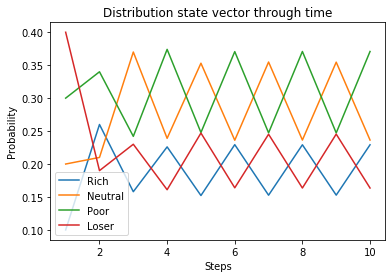

False

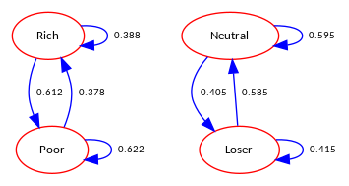

In [4]:
G.generate_state_graph(10)
G.generate_graph(4)
G.is_regular()